# Data processing

# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from constants import NUM_SELECTED, CAT_SELECTED, SELECTED_FEATURES

# Data Loading

In [3]:
X_train = pd.read_parquet('../../../data/interim/copper/X_train_rf.parquet')
X_test = pd.read_parquet('../../../data/interim/copper/X_test_rf.parquet')

# PCA

In [6]:
# Perform PCA
pca = PCA()
pca.fit(X_train[NUM_SELECTED])

# Get the principal components
principal_components = pca.components_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [10]:
weights = pd.Series(explained_variance_ratio*100)

In [12]:
weights.cumsum()

0      27.686854
1      54.018117
2      67.067214
3      75.889963
4      81.986488
5      86.800427
6      90.396709
7      93.099440
8      94.854844
9      96.426061
10     97.636442
11     98.615267
12     99.325612
13     99.887734
14     99.999999
15    100.000000
16    100.000000
dtype: float64

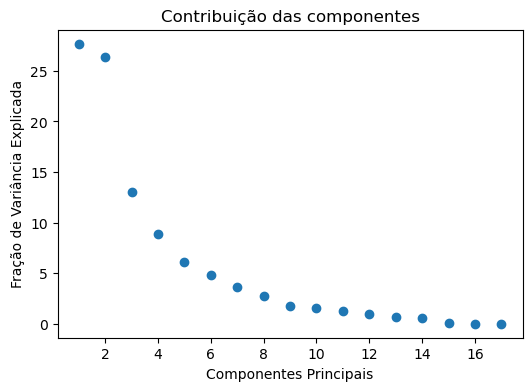

In [13]:
# Plot the explained variance ratio
components = range(1, weights.size + 1)

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(components, weights)
ax.set_xlabel('Componentes Principais')
ax.set_ylabel('Fração de Variância Explicada')
ax.set_title('Contribuição das componentes')

plt.show()

In [14]:
NUM_COMP = 5

pca = PCA(n_components=NUM_COMP)
PCA_COLS = [f'PCA{i+1}' for i in range(NUM_COMP)]

X_train_pca = pca.fit_transform(X_train[NUM_SELECTED])
X_train_pca = pd.DataFrame(X_train_pca, columns=PCA_COLS, index=X_train.index)

X_test_pca = pca.transform(X_test[NUM_SELECTED])
X_test_pca = pd.DataFrame(X_test_pca, columns=PCA_COLS, index=X_test.index)

In [15]:
X_train_small = pd.concat([X_train_pca, X_train[CAT_SELECTED]], axis=1)
X_test_small = pd.concat([X_test_pca, X_test[CAT_SELECTED]], axis=1)

In [16]:
X_train_small.to_parquet('../../../data/interim/copper/X_train_small.parquet')
X_test_small.to_parquet('../../../data/interim/copper/X_test_small.parquet')